In [81]:
import numpy
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import LearningShapelets, \
    grabocka_params_to_shapelet_size_dict
from tslearn.utils import ts_size
import numpy
from sklearn.metrics import accuracy_score

from tslearn.generators import random_walk_blobs
from tslearn.preprocessing import TimeSeriesScalerMinMax, \
    TimeSeriesScalerMeanVariance
from tslearn.neighbors import KNeighborsTimeSeriesClassifier, \
    KNeighborsTimeSeries
import pandas as pd
import numpy as np
import random
from tslearn.datasets import UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesResampler
from sktime.classification.kernel_based import RocketClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, roc_auc_score, roc_curve
from sktime.classification.feature_based import Catch22Classifier

In [82]:
df = pd.read_pickle("Train.pkl")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop(df.loc[(df.Batch == 238)&(df["CuStepNo ValueY"] == 3)].tail(1).index,inplace=True)

In [83]:
randomlist1 = random.sample(range(0, 260), 78)

df_test1 = df.loc[df["Batch"].isin(randomlist1)]
df_train1 = df.loc[~df["Batch"].isin(randomlist1)]

In [84]:
df_steps1 = df_test1.loc[df_test1["CuStepNo ValueY"] != df_test1["Next_Step"]]
df_steps2 = df_train1.loc[df_train1["CuStepNo ValueY"] != df_train1["Next_Step"]]
y_train1 = df_steps2["DeviationID ValueY"].astype(int)
y_test1 = df_steps1["DeviationID ValueY"].astype(int)
X_train1 = df_train1.drop(["DeviationID ValueY","Next_Step","timestamp"],axis=1)
X_test1 = df_test1.drop(["DeviationID ValueY","Next_Step","timestamp"],axis=1)

In [85]:
from tslearn.metrics import dtw
from tslearn.metrics import dtw_path
from tslearn.metrics import dtw_subsequence_path
from tslearn.metrics import dtw_path_from_metric
y_predicted = []
for k in X_test1.Batch.unique():
    for l in X_test1["CuStepNo ValueY"].unique():
        score = []
        for i in range(1,11):
            meanscore = []
            for j in df_train1[(df_train1["CuStepNo ValueY"] == 8)&(df_train1["DeviationID ValueY"] == i)].Batch.unique():
                meanscore.append(dtw(X_test1[(X_test1["CuStepNo ValueY"]==l)&(X_test1["Batch"]==k)].drop(["Batch"],axis=1),df_train1[(df_train1["DeviationID ValueY"]==i)&(df_train1["CuStepNo ValueY"]==l)&(df_train1["Batch"]==j)].drop(["DeviationID ValueY","Batch","Next_Step","timestamp"],axis=1)))
            score.append(np.min(meanscore))
        y_predicted.append(np.argmin(score)+1)

In [86]:
y_predicted

[7,
 1,
 5,
 5,
 1,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 7,
 10,
 1,
 4,
 1,
 5,
 1,
 1,
 5,
 5,
 1,
 1,
 5,
 7,
 1,
 1,
 1,
 5,
 1,
 1,
 5,
 5,
 1,
 1,
 5,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 1,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 1,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 10,
 9,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 10,
 6,
 7,
 7,
 6,
 6,
 7,
 7,
 7,
 6,
 7,
 7,
 8,
 6,
 8,
 8,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 9,
 9,
 9,
 10,
 

In [87]:
y_train_step1 = df_steps2.loc[df_steps2["CuStepNo ValueY"] == 1,"DeviationID ValueY"].astype(int)
y_train_step7 = df_steps2.loc[df_steps2["CuStepNo ValueY"] == 7,"DeviationID ValueY"].astype(int)
y_train_step8 = df_steps2.loc[df_steps2["CuStepNo ValueY"] == 8,"DeviationID ValueY"].astype(int)
y_train_step3 = df_steps2.loc[df_steps2["CuStepNo ValueY"] == 3,"DeviationID ValueY"].astype(int)

#step1
X_train_step1 = []
for i in X_train1.Batch.unique():
        num = numpy.array(X_train1.loc[(X_train1["Batch"] == i)&(X_train1["CuStepNo ValueY"] == 1)].drop(["Batch","CuStepNo ValueY"],axis=1))
        X_train_step1.append(num)
X_test_step1 = []
for i in X_test1.Batch.unique():
        num = numpy.array(X_test1.loc[(X_test1["Batch"] == i)&(X_test1["CuStepNo ValueY"] == 1)].drop(["Batch","CuStepNo ValueY"],axis=1))
        X_test_step1.append(num)
#step7
X_train_step7 = []
for i in X_train1.Batch.unique():
        num = numpy.array(X_train1.loc[(X_train1["Batch"] == i)&(X_train1["CuStepNo ValueY"] == 7)].drop(["Batch","CuStepNo ValueY"],axis=1))
        X_train_step7.append(num)
X_test_step7 = []
for i in X_test1.Batch.unique():
        num = numpy.array(X_test1.loc[(X_test1["Batch"] == i)&(X_test1["CuStepNo ValueY"] == 7)].drop(["Batch","CuStepNo ValueY"],axis=1))
        X_test_step7.append(num)
#step8
X_train_step8 = []
for i in X_train1.Batch.unique():
        num = numpy.array(X_train1.loc[(X_train1["Batch"] == i)&(X_train1["CuStepNo ValueY"] == 8)].drop(["Batch","CuStepNo ValueY"],axis=1))
        X_train_step8.append(num)
X_test_step8 = []
for i in X_test1.Batch.unique():
        num = numpy.array(X_test1.loc[(X_test1["Batch"] == i)&(X_test1["CuStepNo ValueY"] == 8)].drop(["Batch","CuStepNo ValueY"],axis=1))
        X_test_step8.append(num)
#step3
X_train_step3 = []
for i in X_train1.Batch.unique():
        num = numpy.array(X_train1.loc[(X_train1["Batch"] == i)&(X_train1["CuStepNo ValueY"] == 3)].drop(["Batch","CuStepNo ValueY"],axis=1))
        X_train_step3.append(num)
X_test_step3 = []
for i in X_test1.Batch.unique():
        num = numpy.array(X_test1.loc[(X_test1["Batch"] == i)&(X_test1["CuStepNo ValueY"] == 3)].drop(["Batch","CuStepNo ValueY"],axis=1))
        X_test_step3.append(num)

In [88]:
#length
length_step1 = []
for i in X_train_step1:
    length_step1.append(i.__len__())
length_step7 = []
for i in X_train_step7:
    length_step7.append(i.__len__())
length_step8 = []
for i in X_train_step8:
    length_step8.append(i.__len__())
length_step3 = []
for i in X_train_step3:
    length_step3.append(i.__len__())

In [89]:
#Resample
X_train_s1 = TimeSeriesResampler(sz=int(np.median(length_step1))).fit_transform(X_train_step1)
X_test_s1 = TimeSeriesResampler(sz=int(np.median(length_step1))).fit_transform(X_test_step1)
X_train_s7 = TimeSeriesResampler(sz=int(np.median(length_step7))).fit_transform(X_train_step7)
X_test_s7 = TimeSeriesResampler(sz=int(np.median(length_step7))).fit_transform(X_test_step7)
X_train_s8 = TimeSeriesResampler(sz=int(np.median(length_step8))).fit_transform(X_train_step8)
X_test_s8 = TimeSeriesResampler(sz=int(np.median(length_step8))).fit_transform(X_test_step8)
X_train_s3 = TimeSeriesResampler(sz=int(np.median(length_step3))).fit_transform(X_train_step3)
X_test_s3 = TimeSeriesResampler(sz=int(np.median(length_step3))).fit_transform(X_test_step3)

In [90]:
#Reshape
X_train_s1_reshaped = X_train_s1.reshape(X_train_s1.shape[0],39,X_train_s1.shape[1])
X_test_s1_reshaped = X_test_s1.reshape(X_test_s1.shape[0],39,X_test_s1.shape[1])
X_train_s7_reshaped = X_train_s7.reshape(X_train_s7.shape[0],39,X_train_s7.shape[1])
X_test_s7_reshaped = X_test_s7.reshape(X_test_s7.shape[0],39,X_test_s7.shape[1])
X_train_s8_reshaped = X_train_s8.reshape(X_train_s8.shape[0],39,X_train_s8.shape[1])
X_test_s8_reshaped = X_test_s8.reshape(X_test_s8.shape[0],39,X_test_s8.shape[1])
X_train_s3_reshaped = X_train_s3.reshape(X_train_s3.shape[0],39,X_train_s3.shape[1])
X_test_s3_reshaped = X_test_s3.reshape(X_test_s3.shape[0],39,X_test_s3.shape[1])

In [91]:
y_train_step1.shape

(179,)

In [92]:
#Rocket
clf_step1 = RocketClassifier(num_kernels=300) 
clf_step1.fit(X_train_s1_reshaped, np.array(y_train_step1)) 
y_pred_step1 = clf_step1.predict(X_test_s1_reshaped)
y_prep_step1_proba = clf_step1.predict_proba(X_test_s1_reshaped)

#Rocket
clf_step7 = RocketClassifier(num_kernels=300)
clf_step7.fit(X_train_s7_reshaped, np.array(y_train_step7))
y_pred_step7 = clf_step7.predict(X_test_s7_reshaped)
y_prep_step7_proba = clf_step7.predict_proba(X_test_s7_reshaped)

#Rocket
clf_step8 = RocketClassifier(num_kernels=300)
clf_step8.fit(X_train_s8_reshaped, np.array(y_train_step8))
y_pred_step8 = clf_step8.predict(X_test_s8_reshaped)
y_prep_step8_proba = clf_step8.predict_proba(X_test_s8_reshaped)

#Rocket
clf_step3 = RocketClassifier(num_kernels=300)
clf_step3.fit(X_train_s3_reshaped, np.array(y_train_step3))
y_pred_step3 = clf_step3.predict(X_test_s3_reshaped)
y_prep_step3_proba = clf_step3.predict_proba(X_test_s3_reshaped)

In [93]:
y_pred_rocket = list(zip(y_pred_step1,y_pred_step7,y_pred_step8,y_pred_step3))
y_prep_rocket_proba = list(zip(y_prep_step1_proba,y_prep_step7_proba,y_prep_step8_proba,y_prep_step3_proba))


In [94]:
y_test1

2102      5
2350      5
2416      5
3012      5
8917      1
         ..
258177    9
261541    9
261846    9
261918    9
262455    9
Name: DeviationID ValueY, Length: 288, dtype: int32

In [95]:
np.array(y_pred_rocket).flatten().shape

(288,)

In [96]:
accuracy_score(y_test1,np.array(y_pred_rocket).flatten())

0.8333333333333334

In [97]:
round(X_train_s7.shape[1]/10)

7

In [99]:
#Learning Shapelets
shp_clf_step1 = LearningShapelets(n_shapelets_per_size={round(X_train_s1.shape[1]/10):10},
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=200,
                            weight_regularizer=.01,
                            max_iter=250,
                            random_state=42,
                            scale=True,
                            verbose=0)
shp_clf_step1.fit(X_train_s1, y_train_step1)
y_pred_step1 = shp_clf_step1.predict(X_test_s1)
y_prep_step1_proba = shp_clf_step1.predict_proba(X_test_s1)
print("1")

#Learning Shapelets
shp_clf_step7 = LearningShapelets(n_shapelets_per_size={round(X_train_s7.shape[1]/10):10},
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=200,
                            weight_regularizer=.01,
                            max_iter=250,
                            random_state=42,
                            scale=True,
                            verbose=0)
shp_clf_step7.fit(X_train_s7, y_train_step7)
y_pred_step7 = shp_clf_step7.predict(X_test_s7)
y_prep_step7_proba = shp_clf_step7.predict_proba(X_test_s7)
print("7")

#Learning Shapelets
shp_clf_step8 = LearningShapelets(n_shapelets_per_size={round(X_train_s8.shape[1]/10):10},
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=200,
                            weight_regularizer=.01,
                            max_iter=250,
                            random_state=42,
                            scale=True,
                            verbose=0)
shp_clf_step8.fit(X_train_s8, y_train_step8)
y_pred_step8 = shp_clf_step8.predict(X_test_s8)
y_prep_step8_proba = shp_clf_step8.predict_proba(X_test_s8)
print("8")

#Learning Shapelets
shp_clf_step3 = LearningShapelets(n_shapelets_per_size={round(X_train_s3.shape[1]/10):10},
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=200,
                            weight_regularizer=.01,
                            max_iter=250,
                            random_state=42,
                            scale=True,
                            verbose=0)
shp_clf_step3.fit(X_train_s3, y_train_step3)
y_pred_step3 = shp_clf_step3.predict(X_test_s3)
y_prep_step3_proba = shp_clf_step3.predict_proba(X_test_s3)

1
7
8


In [100]:
y_pred_shapelet = list(zip(y_pred_step1,y_pred_step7,y_pred_step8,y_pred_step3))
y_prep_shapelet_proba = list(zip(y_prep_step1_proba,y_prep_step7_proba,y_prep_step8_proba,y_prep_step3_proba))


In [101]:
accuracy_score(y_test1,np.array(y_pred_shapelet).flatten())

0.5555555555555556

In [102]:
#Catch22
clf_step1 = Catch22Classifier()
clf_step1.fit(X_train_s1_reshaped, y_train_step1)
y_pred_step1 = clf_step1.predict(X_test_s1_reshaped)
print("1")
#Catch22
clf_step7 = Catch22Classifier()
clf_step7.fit(X_train_s7_reshaped, y_train_step7)
y_pred_step7 = clf_step7.predict(X_test_s7_reshaped)
print("7")
#Catch22
clf_step8 = Catch22Classifier()
clf_step8.fit(X_train_s8_reshaped, y_train_step8)
y_pred_step8 = clf_step8.predict(X_test_s8_reshaped)
print("8")
#Catch22
clf_step3 = Catch22Classifier()
clf_step3.fit(X_train_s3_reshaped, y_train_step3)
y_pred_step3 = clf_step3.predict(X_test_s3_reshaped)

1
7
8


In [103]:
y_prep_step1_proba = clf_step1.predict_proba(X_test_s1_reshaped)
y_prep_step7_proba = clf_step7.predict_proba(X_test_s7_reshaped)
y_prep_step8_proba = clf_step8.predict_proba(X_test_s8_reshaped)
y_prep_step3_proba = clf_step3.predict_proba(X_test_s3_reshaped)

In [104]:
y_pred_catch22 = list(zip(y_pred_step1,y_pred_step7,y_pred_step8,y_pred_step3))
y_prep_catch22_proba = list(zip(y_prep_step1_proba,y_prep_step7_proba,y_prep_step8_proba,y_prep_step3_proba))

In [105]:
y_test1

2102      5
2350      5
2416      5
3012      5
8917      1
         ..
258177    9
261541    9
261846    9
261918    9
262455    9
Name: DeviationID ValueY, Length: 288, dtype: int32

In [106]:
y_test_proba = y_test1 == 1

In [107]:
y_test_proba.value_counts()

False    252
True      36
Name: DeviationID ValueY, dtype: int64

In [108]:
y_predicted_proba = np.array(y_predicted) == 1

In [109]:
fpr1, tpr1, thresholds1 = roc_curve(y_test_proba,y_predicted_proba)

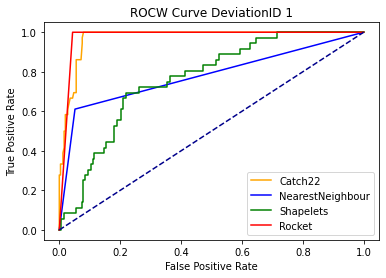

In [112]:
#plotting ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y_test_proba,y_predicted_proba)
fpr, tpr, thresholds = roc_curve(y_test_proba,np.array(y_prep_catch22_proba).flatten().reshape(288,10)[:,0])
fpr2, tpr2, thresholds2 = roc_curve(y_test_proba,np.array(y_prep_shapelet_proba).flatten().reshape(288,10)[:,0])
fpr3, tpr3, thresholds3 = roc_curve(y_test_proba,np.array(y_prep_rocket_proba).flatten().reshape(288,10)[:,0])

plt.plot(fpr, tpr, color='orange', label='Catch22')
plt.plot(fpr1, tpr1, color='blue', label='NearestNeighbour')
plt.plot(fpr2, tpr2, color='green', label='Shapelets')
plt.plot(fpr3, tpr3, color='red', label='Rocket')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROCW Curve DeviationID 1')
plt.legend()
plt.show()


In [ ]:
plt.step(fpr, tpr, color='b', alpha=0.2,where='post')

In [ ]:
plot_roc_curve(X_test, y_test, 
 y_predict= [
  [best_gbc, y_pred_test_best_gbc, "GradientBoostingClassifier"],
  [best_dtc, y_pred_test_best_dtc, "DecisionTreeClassifier"],
  [clf, y_pred_test_best_clf, "LinearSVC"],
  [rfc, y_pred_test_best_rfc, "RandomForest"],
  [best_lrc, y_pred_test_best_lrc, "LogisticRegression"]
  ]
 )